## Heart Monitor
Another very useful personal application of AI in IoT is the in the detection of heart diseases. A large number of wearables exist which can be used to monitor and record the heart rate. The data can be used to predict any harmful heart condition. Here we will employ the AI/ML tools to predict cardiac Arrhythmia, a group of conditions where the heart rate is irregular, it can be either too fast (above 100 beats per minute) or too slow (below 60 beats per minute). The data used is taken from the [UCI Ml dataset repo](https://archive.ics.uci.edu/ml/datasets/heart+Disease). The dataset consists of 76 attributes, not all required for prediction of the presence of disease, the dataset has a "goal" field associated with each data row, it has five possible values 0-4, the value 0 indicates healthy heart, any other value means there is a disease. The problem can be broken into a binary classification problem for better accuracy.  The code is inspired from the GitHub link of [Mohammed Rashad](https://github.com/MohammedRashad/Deep-Learning-and-Wearable-IoT-to-Monitor-and-Predict-Cardiac-Arrhytmia), it is shared under the GNU GPL 3.0 license.

The first step as always is to import the necessary modules. Since we are now classifying the patients as suffering from heart disease or not, we will need a classifier. Here for simplicity, we use SVC classifier. You can experiment with MLP classifier

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Next, read the dataset, preprocess the dataset to select attributes you will be considering, we choose 13 attributes from 76. And we convert the target from a multi-class value to binary class. Finally, the data is split in train and test dataset.

In [2]:
# reading csv file and extracting class column to y.
dataset = pd.read_csv("data.csv")
dataset.fillna(dataset.mean(), inplace=True)

dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57] # "Target" classes having 0 and 1
label = label.astype('int')
label[label>0] = 1 # When it is 0 heart is healthy, 1 otherwise

In [3]:
# extracting 13 features
dataset = np.column_stack((
    dataset_to_array[:,4] ,       # pain location
    dataset_to_array[:,6] ,       # relieved after rest
    dataset_to_array[:,9] ,       # pain type 
    dataset_to_array[:,11],       # resting blood pressure
    dataset_to_array[:,33],       # maximum heart rate achieved
    dataset_to_array[:,34],       # resting heart rate 
    dataset_to_array[:,35],       # peak exercise blood pressure (first of 2 parts) 
    dataset_to_array[:,36],       # peak exercise blood pressure (second of 2 parts) 
    dataset_to_array[:,38],       # resting blood pressure 
    dataset_to_array[:,39],       # exercise induced angina (1 = yes; 0 = no) 
    dataset.age,                  # age 
    dataset.sex ,                 # sex
    dataset.hypertension          # hyper tension
   ))

print ("The Dataset dimensions are : " , dataset.shape , "\n")

The Dataset dimensions are :  (617, 13) 



In [4]:
# dividing data into train and test data
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state = 223)

Now, we define the model to be used, here we are using support vector classifier, using the fit function train it on train dataset.

In [5]:
model = SVC(kernel = 'linear').fit(X_train, y_train)


Let us see its performance on the test dataset. 

In [6]:
model_predictions = model.predict(X_test)
# model accuracy for X_test  
accuracy = metrics.accuracy_score(y_test, model_predictions)
print ("Accuracy of the model is :" , 
       accuracy , "\nApproximately : ", 
       round(accuracy*100) , "%\n")

Accuracy of the model is : 0.7419354838709677 
Approximately :  74.0 %



You can see that it provides an accuracy of 74%, using MLP we can increase it further. But do remember to normalize all the input features before using MLP Classifier. Below is the confusion matrix of our trained support vector classifier on the test dataset.

In [7]:
# creating a confusion matrix
cm = confusion_matrix(y_test, model_predictions)


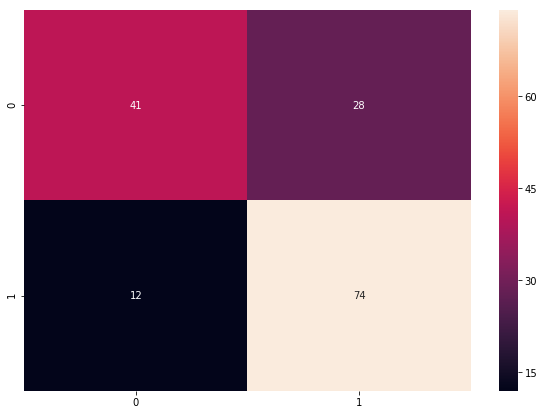

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)